# t-Stochastic Neighbor Embedding

In [21]:
import pandas as pd 
import io 

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

# EDA Dataset

In [26]:
crabs_data = pd.read_csv("crabs.csv")

In [27]:
crabs_data.tail()

,sp,sex,index,FL,RW,CL,CW,BD
195,O,F,46,21.4,18.0,41.2,46.2,18.7
196,O,F,47,21.7,17.1,41.7,47.2,19.6
197,O,F,48,21.9,17.2,42.6,47.4,19.5
198,O,F,49,22.5,17.2,43.0,48.7,19.8
199,O,F,50,23.1,20.2,46.2,52.5,21.1


In [7]:
crabs_data.head()

,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


In [8]:
crabs_data.describe

<bound method NDFrame.describe of     sp sex  index    FL    RW    CL    CW    BD
0    B   M      1   8.1   6.7  16.1  19.0   7.0
1    B   M      2   8.8   7.7  18.1  20.8   7.4
2    B   M      3   9.2   7.8  19.0  22.4   7.7
3    B   M      4   9.6   7.9  20.1  23.1   8.2
4    B   M      5   9.8   8.0  20.3  23.0   8.2
..  ..  ..    ...   ...   ...   ...   ...   ...
195  O   F     46  21.4  18.0  41.2  46.2  18.7
196  O   F     47  21.7  17.1  41.7  47.2  19.6
197  O   F     48  21.9  17.2  42.6  47.4  19.5
198  O   F     49  22.5  17.2  43.0  48.7  19.8
199  O   F     50  23.1  20.2  46.2  52.5  21.1

[200 rows x 8 columns]>

In [28]:
crabs_data = crabs_data.rename(
    columns = {
        "sp": "species",
        "FL": "Frontal Lobe",
        "RW": "Rear Width",
        "CL": "Carapace Midline",
        "CW": "Maximum Width",
        "BD": "Body Depth"
    }
)

In [29]:
crabs_data["species"] = crabs_data["species"].map(
    {"B": "Blue", "O": "Orange"}
)

crabs_data["sex"] = crabs_data["sex"].map(
    {"M": "Male", "F": "Female"}
)

In [30]:
crabs_data

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...,...,...,...
195,Orange,Female,46,21.4,18.0,41.2,46.2,18.7
196,Orange,Female,47,21.7,17.1,41.7,47.2,19.6
197,Orange,Female,48,21.9,17.2,42.6,47.4,19.5
198,Orange,Female,49,22.5,17.2,43.0,48.7,19.8


## Using t-SNE on Raw Data

Add the class data with this unique identifier we've made up:

In [31]:
crabs_data["class"] = crabs_data.species + crabs_data.sex

tSNE transforms distance between points into probabilities, then tries to keep the same probability distributions while transforming data to a lower dimensional space.  

It depends on initialization and its results may change between runs. 
**strongly depends** on parameters. Generall used for visualization not for dimensionality reduction. 

**MOST IMPORTANT PARAMATERS OF THIS MODEL**  

1. **PERPLEXITY** balances attention between the local and global aspect of the data. This will usually be between 5 adn 50 and has a very strong effect on the final display

2. **NUMBER ITERATIONS** 

In [49]:
data_columns = [
    "Frontal Lobe", "Rear Width", "Carapace Midline",
    "Maximum Width", "Body Depth"
]

## Using Raw Data (no process)

### 2 Dimensions 

In [50]:
# execute the TSNE engine
crabs_tsne = TSNE(
    n_components=2, perplexity=10, n_iter = 2000, init="random"
).fit_transform(crabs_data[data_columns])

In [51]:
crabs_data[["TSNE1", "TSNE2"]] = crabs_tsne

In [54]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,TSNE1,TSNE2
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale,-6.903159,61.119114
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale,-5.796356,59.448009
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale,-3.911477,58.517956
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale,-2.242760,57.083687
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale,-2.193069,55.986835


Plot the TSNE   

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

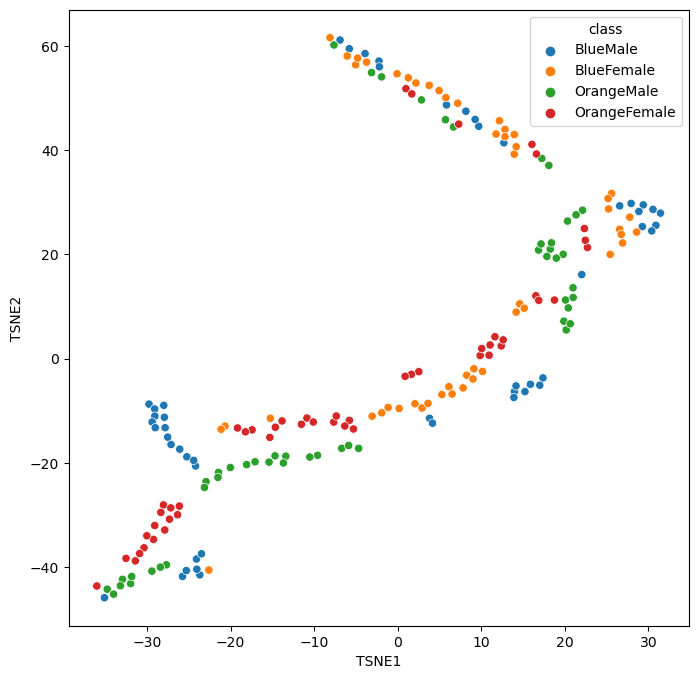

In [56]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(
    x="TSNE1", y="TSNE2", hue="class", data=crabs_data
)

This plot is going to be different every time because this is a stochastic process with different seeding each time. 

### 3 Dimensions

In [57]:
# recall the data engine with update parameters (3D)
crabs_tsne = TSNE(
    n_components=3, perplexity=10, n_iter=2000, init="random"
).fit_transform(crabs_data[data_columns])



Append data to `crabs_data` DF.

In [61]:
crabs_data[["TSNE1", "TSNE2", "TSNE3"]] = crabs_tsne

In [62]:
# remap colors dictionary:
# good for 3D rendering
colors_crabs = {
    'BlueFemale': 'y', 'BlueMale':'b', 'OrangeFemale': 'r', "OrangeMale": 'g'
}

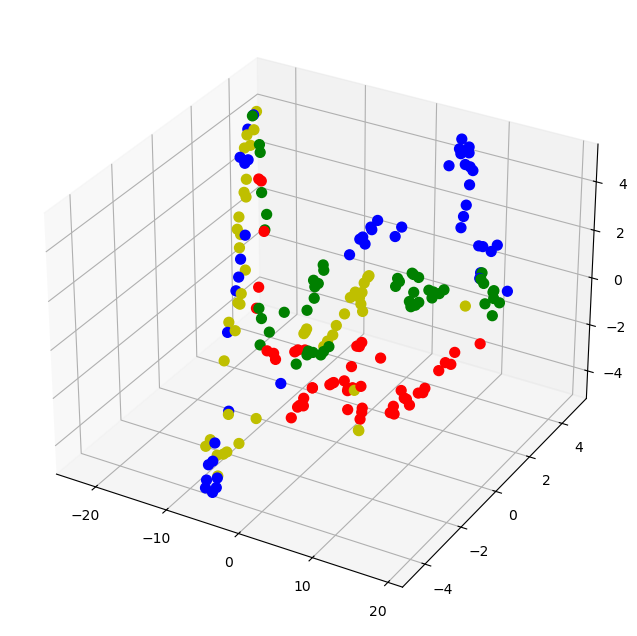

In [67]:
# scatter plot calls

# need figure and an axis (for 3D, latter applies especially)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(
    crabs_data.TSNE1, 
    crabs_data.TSNE2, 
    zs=crabs_data.TSNE2,
    depthshade=False,
    c=crabs_data["class"].apply(lambda x: colors_crabs[x]),
    s=50
)

**do it again but with plotly**

In [77]:
fig = px.scatter_3d(
    crabs_data,
    x="TSNE1",
    y="TSNE2",
    z="TSNE3",
    color="class"
)

# plotly express when stored as a variable needs to explicitly say show
fig.show()

## t-SNE with Scaled Data

Get the data... again! May want to restart the kernel since we have some already executed code upstairs.  

It's okay to rerun the same import library.

In [6]:
crabs_data = pd.read_csv("crabs.csv")

In [7]:
crabs_data.head()

,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


### Data formatting

In [27]:
# Column rename

crabs_data = crabs_data.rename(columns={
    "sp": "species", "FL": "Frontal Lobe", "RW": "Rear Width",
    "CW": "Maximum Width", "BD": "Body Depth", "CL": "Carapace Midline"
})

# remap some df values for more clear reading.
crabs_data["species"] = crabs_data["species"].map(
    {
        "B": "Blue", "O": "Orange"
    }
)

crabs_data["sex"] = crabs_data["sex"].map(
    {
        "M": "Male", "F": "Female"
    }
)



Make that re-mappend column (by diagonalization theorem) used to reduce this 2x2 field into a qx1 field... (math talk)

In [17]:
crabs_data["class"] = crabs_data.species + crabs_data.sex

Specify some data columns for relevant data (columns).

In [28]:
data_columns = [
    "Frontal Lobe", "Rear Width", "Carapace Midline", "Maximum Width", "Body Depth"
]

### Do some t-stochastic neighbor embedding ... this time with scaling

Apply min_max rescaling

In [40]:
# apply min_max rescaling
# may want to copy the original data as dataframe? 
# this is because MinMaxScalar returns an array not a DF! so if we want to 
# retain the same DF format as before witht his transformed data
# we have to re-pipe it in there hence the `crabs_min_max[data_columns]`` call.
crabs_min_max = crabs_data.copy()
crabs_min_max[data_columns] = MinMaxScaler().fit_transform(
    crabs_data[data_columns]
)

### CALL TSNE for 2D 

In [43]:
# apply the TSNE engine
crabs_tsne = TSNE(
    n_components=2, perplexity=10, n_iter=1000, init="random"
).fit_transform(crabs_min_max[data_columns])

# append result to the original min_max dataframe
crabs_min_max[["TSNE1", "TSNE2"]] = crabs_tsne

Do some plotting with matplotlib.

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

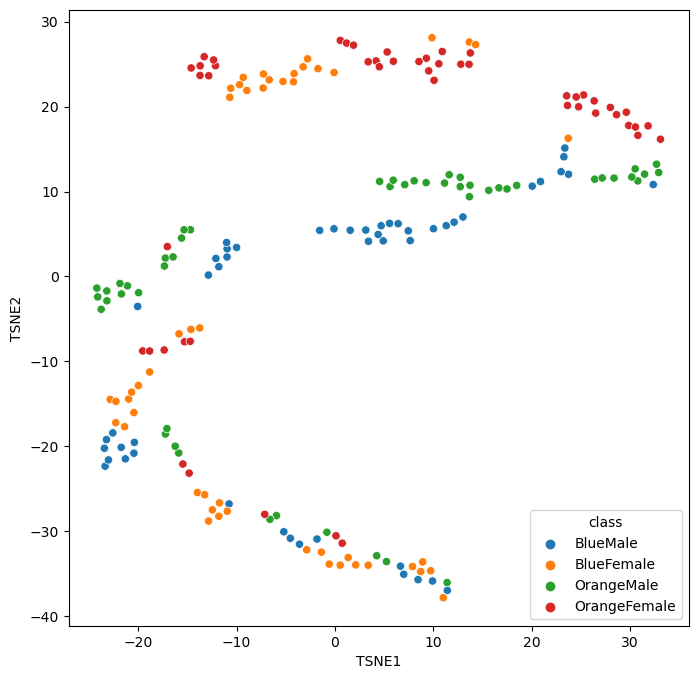

In [44]:
# start a figure
fig = plt.figure(figsize=(8,8))

sns.scatterplot(
    x="TSNE1", y="TSNE2", hue="class", data=crabs_min_max
)

Remember you will get a different result each time this is run because it will use a different seed value and it is stochastic in nature.

### Do TSNE but this time in 3D!

In [46]:
# call the TSNE engine
crabs_tsne = TSNE(
    n_components=3, perplexity=10, n_iter=1000, init="random"
).fit_transform(crabs_min_max[data_columns])



In [47]:
# append to min_max DF
crabs_min_max[["TSNE1", "TSNE2", "TSNE3"]] = crabs_tsne

In [48]:
crabs_min_max.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,TSNE1,TSNE2,TSNE3
0,NaN,NaN,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,14.737606,4.533900,-0.540623
1,NaN,NaN,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,13.607455,4.679700,-0.697540
2,NaN,NaN,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,13.083439,5.381244,-0.446916
3,NaN,NaN,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,12.356977,6.072396,-0.573142
4,NaN,NaN,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,12.099642,6.102277,-0.567756


Now do some visualization 

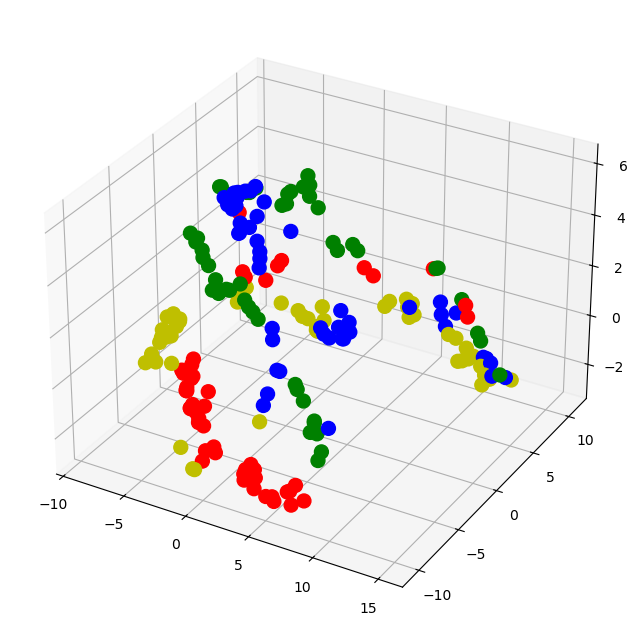

In [52]:
# define the colors keys for the classes in a seaparate dictionary for convenience.
color_crabs = {
    "BlueFemale": "y", "BlueMale": "b", "OrangeFemale":"r", "OrangeMale":"g"
}

# start a figure and extend the axis to 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

# execute the scatter plot
plt.scatter(
    crabs_min_max.TSNE1,
    crabs_min_max.TSNE2,
    zs=crabs_min_max.TSNE3,
    depthshade=False,
    s=100,
    c=crabs_min_max["class"].apply(lambda x: color_crabs[x])
)

**do it again but in plotly**

In [56]:
fig = px.scatter_3d(
    crabs_min_max,
    x="TSNE1",
    y="TSNE2",
    z="TSNE3",
    color="class"
)

fig.show()